In [261]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from glob import glob

In [262]:
def bar_plot(ax, y, title='', labels=[], start_from_zero=False):
    if start_from_zero:
        x_base = list(range(len(y[0])))
    else:
        x_base = list(range(1, len(y[0]) + 1))
    
    # Width of each bar
    width = 0.8 / len(y)  # Divide the space to fit all bars

    # Define colors and prepare bar groups
    colors = cm.tab10(range(len(y)))
    for i, (yi, label, color) in enumerate(zip(y, labels, colors)):
        # Offset each bar group by adjusting x
        x = [xi + i * width - 0.4 for xi in x_base]  # Center bars around the base x
        ax.bar(x, yi, width=width, color=color, edgecolor='black', label=label, alpha=0.7)
    
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Iteracja', fontsize=9)
    ax.set_ylabel('Value', fontsize=9)  # Generic y-label for readability
    ax.set_xticks(x_base)
    ax.set_xticklabels([str(i) for i in x_base], fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))


In [263]:
def plot_results(results_files, attack_names):
    attack_test_accs = []
    test_accs = []
    combined_accs = []
    oneshot_attack_test_accs = []
    epochs_accs = []
    epochs_for_accs = []

    min_max_accs = []
    for results_file, attack_name in zip(results_files, attack_names):
        with open(results_file, "r") as json_file:
            results = json.load(json_file)
            epochs_acc = [x['epochs_acc'] for x in results['training_results']]
            min_max_acc = min([max(x) for x in epochs_acc])
            min_max_accs.append(min_max_acc)

    min_max_acc = min(min_max_accs)
    
    for results_file, attack_name in zip(results_files, attack_names):
        with open(results_file, "r") as json_file:
            results = json.load(json_file)
            
        attack_test_acc = [results['pre_train_results']['attack_test_acc']] + [x['attack_test_acc'] for x in results['training_results']]
        test_acc = [results['pre_train_results']['test_acc']] + [x['test_acc'] for x in results['training_results']]
        combined_acc = [x['combined_acc'] for x in results['training_results']]
        oneshot_attack_test_acc = [x['oneshot_attack_test_acc'] for x in results['training_results']]
        epochs_acc = [x['epochs_acc'] for x in results['training_results']]

        epochs_for_acc = [next((i + 1 for i, val in enumerate(sublist) if val >= min_max_acc), None) for sublist in epochs_acc]

        attack_test_accs.append(attack_test_acc)
        test_accs.append(test_acc)
        combined_accs.append(combined_acc)
        oneshot_attack_test_accs.append(oneshot_attack_test_acc)
        epochs_accs.append(epochs_acc)
        epochs_for_accs.append(epochs_for_acc)

    fig, axes = plt.subplots(2, 2, figsize=(16, 9))
    fig.subplots_adjust(wspace=0.4)

    bar_plot(axes[0, 0], attack_test_accs, f'Trafność klasyfikacji na adwersarzowym zbiorze testowym', attack_names, True)
    bar_plot(axes[0, 1], test_accs, f'Trafność klasyfikacji na zbiorze testowym (domain drift)', attack_names, True)
    bar_plot(axes[1, 0], oneshot_attack_test_accs, f'Trafność klasyfikacji na nowym adwersarzowym zbiorze testowym', attack_names)
    bar_plot(axes[1, 1], epochs_for_accs, f'Liczba epok potrzebna do osiągnięcia trafności klasyfikacji na poziomie: {min_max_acc:.2f}', attack_names)

    plt.show()

In [264]:
results_files = glob('*.json')
print(results_files)
names = [x.split('_')[0] for x in results_files]
print(names)

['bim_results.json', 'cw_results.json', 'DeepFool_results.json', 'fgsm_results.json', 'op_results.json', 'pgd_results.json', 'spsa_results.json']
['bim', 'cw', 'DeepFool', 'fgsm', 'op', 'pgd', 'spsa']


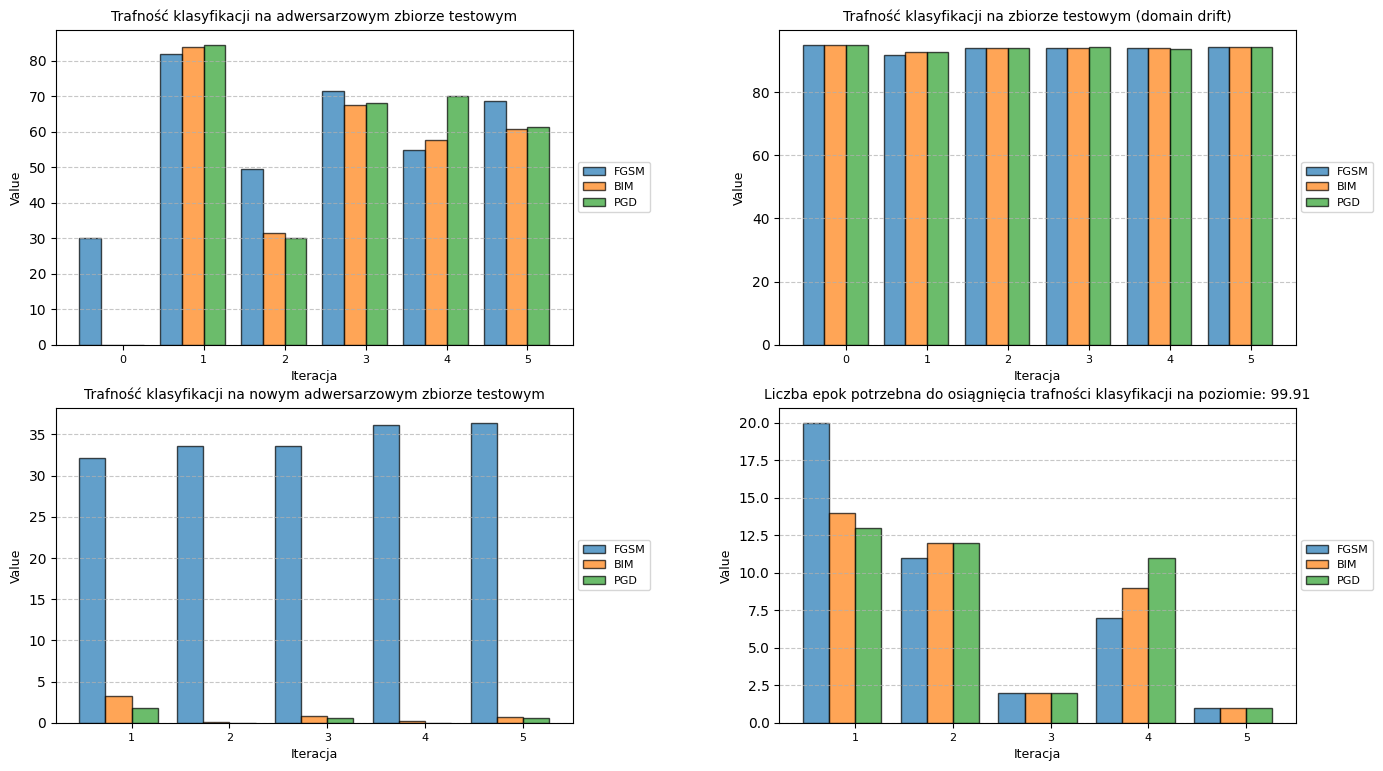

In [265]:
plot_results(['fgsm_results.json', 'bim_results.json', 'pgd_results.json'], ['FGSM', 'BIM', 'PGD'])

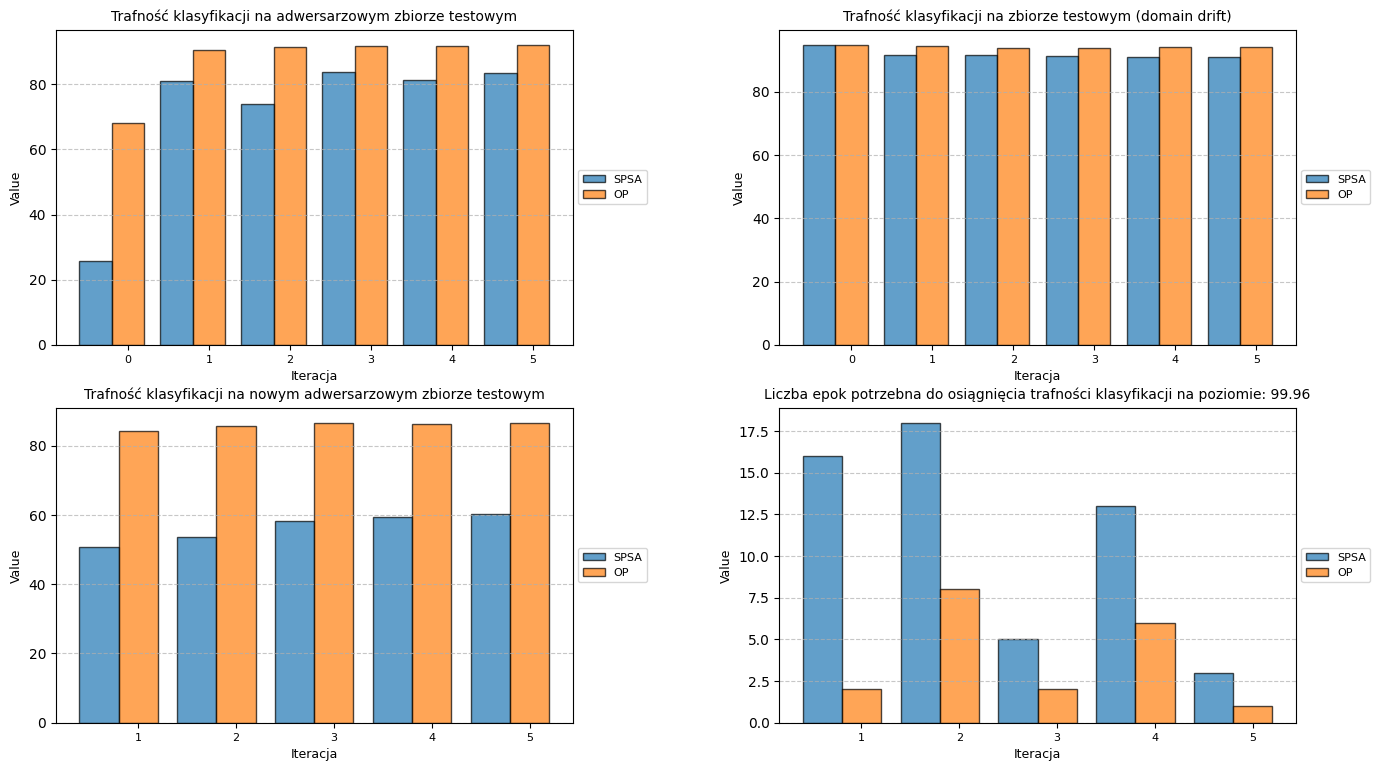

In [266]:
plot_results(['spsa_results.json', 'op_results.json'], ['SPSA', 'OP'])

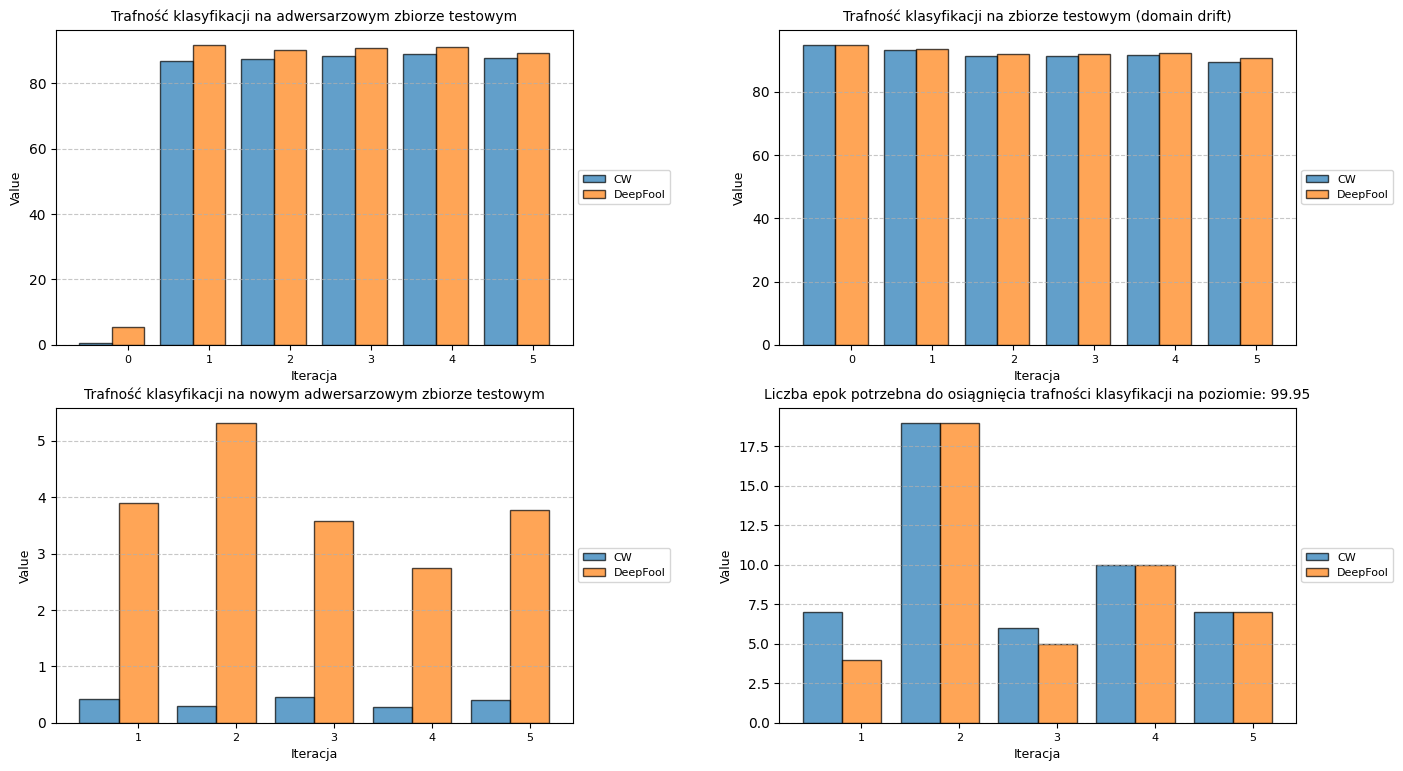

In [267]:
plot_results(['cw_results.json', 'DeepFool_results.json'], ['CW', 'DeepFool'])